Part 1:  Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/Users/aaqibhussain/Downloads/archive/train.csv', delimiter=';')

In [4]:
df.info

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

In [5]:
df.head
df.tail
#output variable of interest is "y", whether or not the client has subscribed to a 
#term deposit

<bound method NDFrame.tail of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [6]:
# Display summary statistics for all columns, including categorical
# Observations: 
# the "balance" (average yearly balance) feauture has a really wide range between -8019 to 102127
# the duration variable is in seconds with aseemingly large range
# Columns like job, marital, education, housing, and loan have a small number of unique categories, 
# while others like poutcome have multiple categories with "unknown" appearing frequently.
summary_statistics = df.describe(include='all')
print("Summary Statistics:\n", summary_statistics)


Summary Statistics:
                  age          job  marital  education default        balance  \
count   45211.000000        45211    45211      45211   45211   45211.000000   
unique           NaN           12        3          4       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN         9732    27214      23202   44396            NaN   
mean       40.936210          NaN      NaN        NaN     NaN    1362.272058   
std        10.618762          NaN      NaN        NaN     NaN    3044.765829   
min        18.000000          NaN      NaN        NaN     NaN   -8019.000000   
25%        33.000000          NaN      NaN        NaN     NaN      72.000000   
50%        39.000000          NaN      NaN        NaN     NaN     448.000000   
75%        48.000000          NaN      NaN        NaN     NaN    1428.000000   
max        95.000000          NaN      NaN        NaN     NaN  102127.000000   

       housing   l

/var/folders/lb/d1z2_ctn1z1fb4st6fb98rf80000gn/T/ipykernel_11808/3430506510.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='viridis')


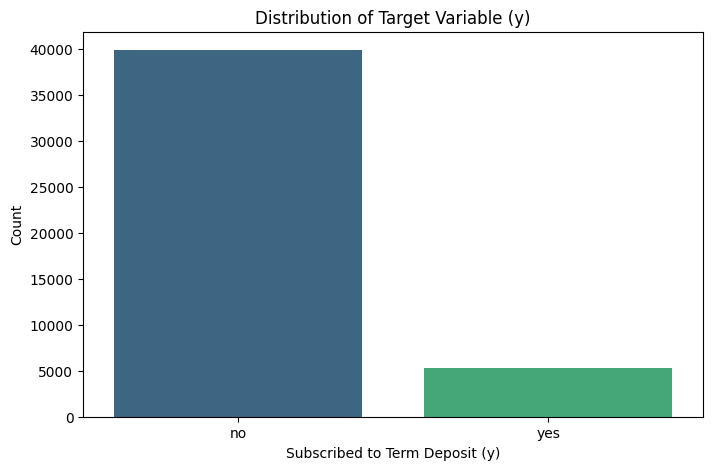

In [3]:
# Visualize the distribution of the target variable 'y'
plt.figure(figsize=(8, 5))
sns.countplot(x='y', data=df, palette='viridis')
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Subscribed to Term Deposit (y)')
plt.ylabel('Count')
plt.show()

This visualization indicates that there is an imbalance in our target variable "y". With more "no" then "yes". This imbalance will be somnething to consider when building our predictive models.

/var/folders/lb/d1z2_ctn1z1fb4st6fb98rf80000gn/T/ipykernel_11808/2351884585.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[feature], kde=True, bins=30, palette='viridis')


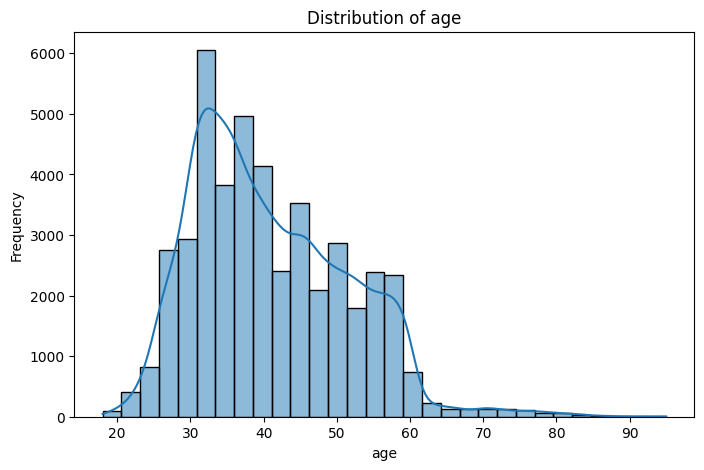

/var/folders/lb/d1z2_ctn1z1fb4st6fb98rf80000gn/T/ipykernel_11808/2351884585.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[feature], kde=True, bins=30, palette='viridis')


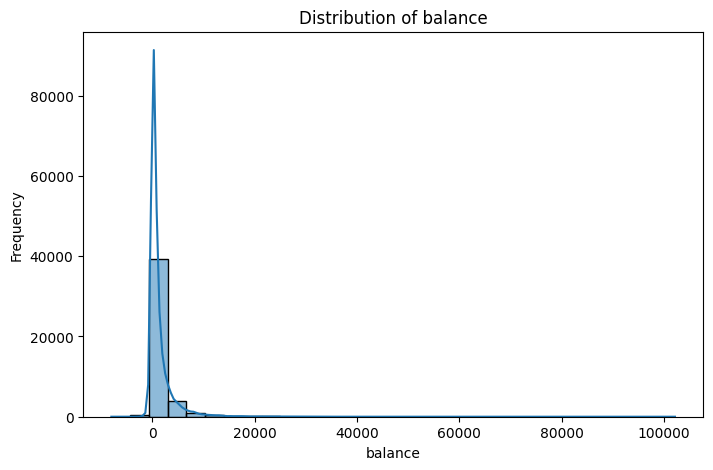

/var/folders/lb/d1z2_ctn1z1fb4st6fb98rf80000gn/T/ipykernel_11808/2351884585.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[feature], kde=True, bins=30, palette='viridis')


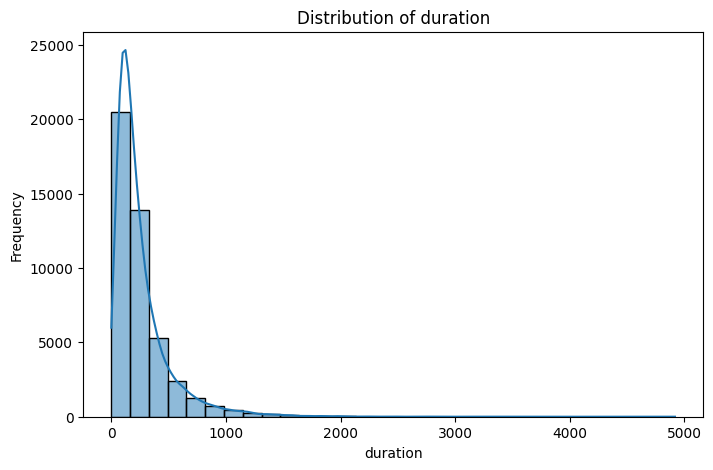

/var/folders/lb/d1z2_ctn1z1fb4st6fb98rf80000gn/T/ipykernel_11808/2351884585.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[feature], kde=True, bins=30, palette='viridis')


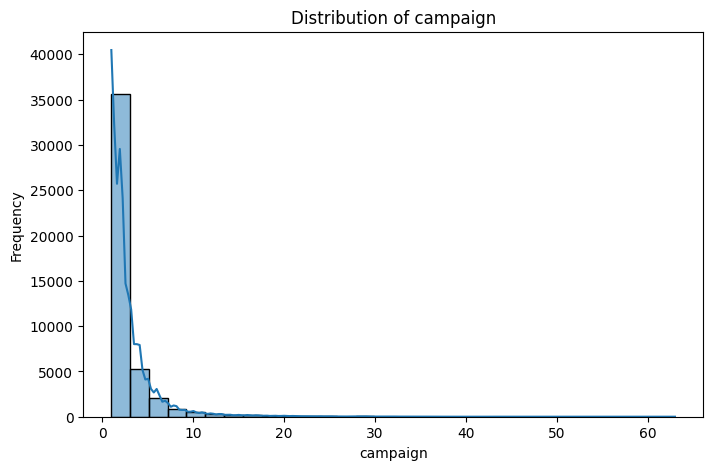

/var/folders/lb/d1z2_ctn1z1fb4st6fb98rf80000gn/T/ipykernel_11808/2351884585.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[feature], kde=True, bins=30, palette='viridis')


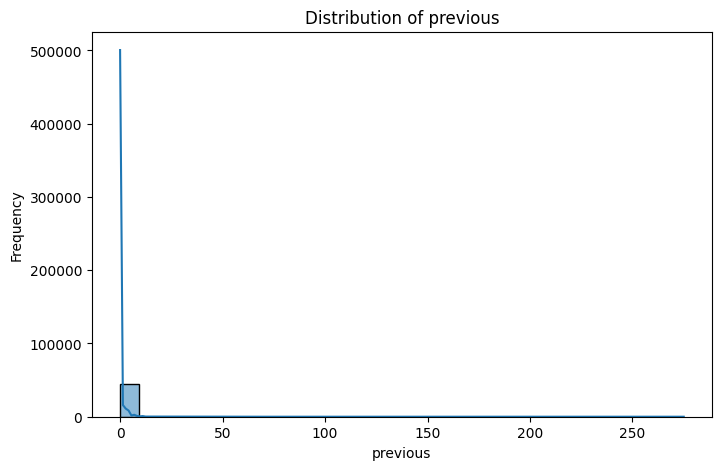

/var/folders/lb/d1z2_ctn1z1fb4st6fb98rf80000gn/T/ipykernel_11808/2351884585.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['pdays'], kde=True, bins=30, palette='viridis')


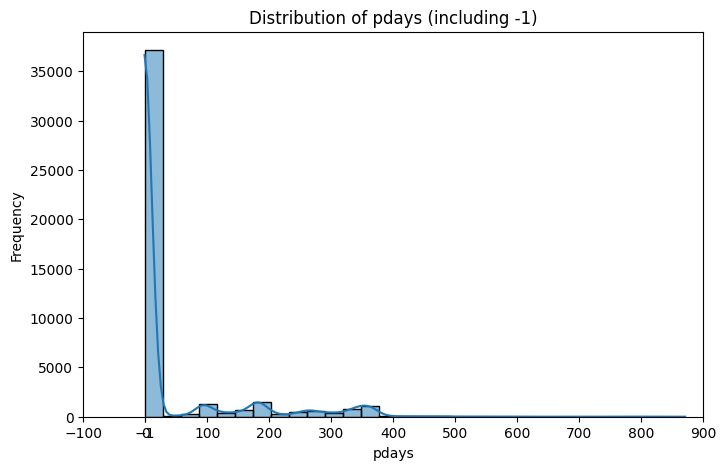

In [7]:
#Now we will analyze the distribution of key numerical features we want to analyze 

# Define the list of numerical features to analyze
numerical_features = ['age', 'balance', 'duration', 'campaign', 'previous']

# Plotting histograms for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True, bins=30, palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Plotting the distribution of 'pdays' 
plt.figure(figsize=(8, 5))
sns.histplot(df['pdays'], kde=True, bins=30, palette='viridis')
plt.title('Distribution of pdays (including -1)')
plt.xlabel('pdays')
plt.ylabel('Frequency')

# Set x-axis limits to include the full range of 'pdays'
plt.xlim(df['pdays'].min(), df['pdays'].max())

# Explicitly set x-ticks to include -1
plt.xticks(list(plt.xticks()[0]) + [-1])

plt.show()


SUMMARY: 
Age: The distribution of age appears to be slightly right-skewed, with a majority of clients falling between the ages of 30 to 60 
Balance: The balance's distribution appears to have a long tail, demonstrating that very few customers seem to have very high average yearly balances, given the product is a cash investment account, there may be a correlation between average account balance and respondants who subscribed to a term deposit.
Duration: in regards to the last contact duration, the majority of values are small,indicating most calls were brief, and only a few lasted signifcantly longer.
We may also want to explore if theres a correlation between contact duration and respondants who subscribed to a term deposit.
Campaign: The number of contacts performed during this campaign and this client, most customers were contacted between 1-3 times, but there are some cases where clients were contacted over 60 times. There may be a correlation between campaigning and response outcome.
Pdays: Pdays: Many records have a value of -1, indicating clients were not previously contacted.
Previous: Most customers have had zero or very few contacts, but some had multiple previous contacts.

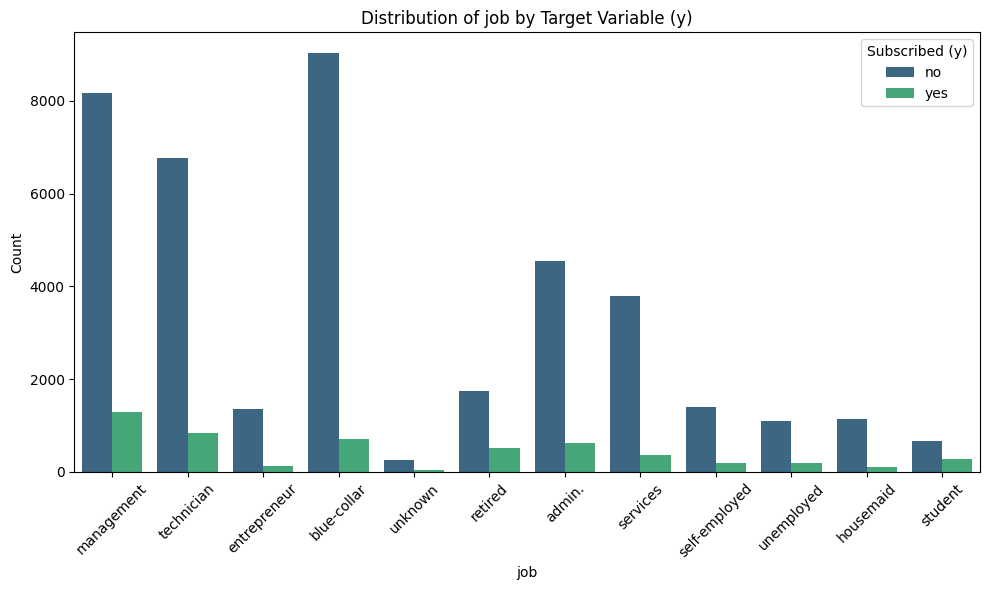

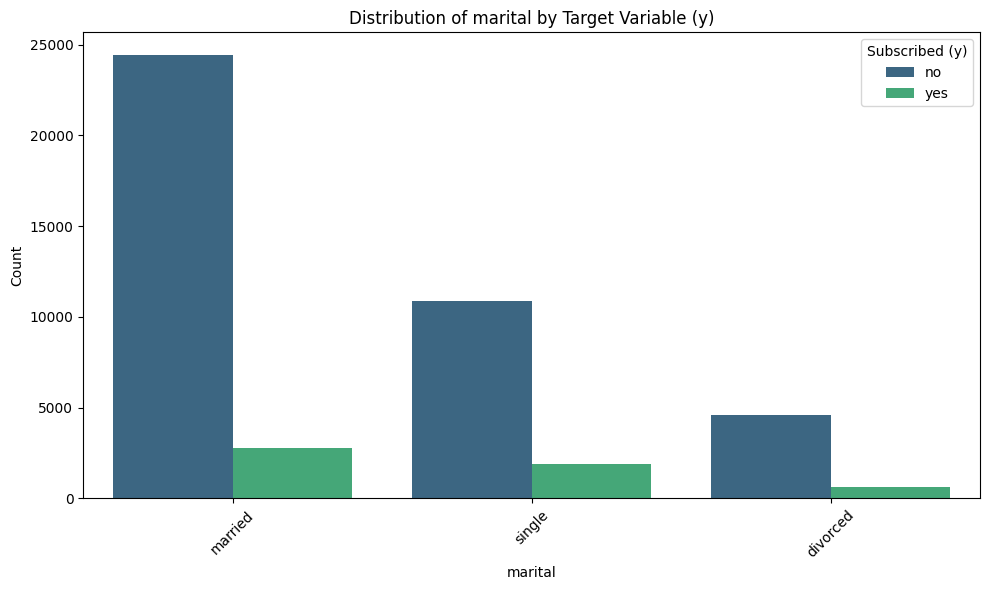

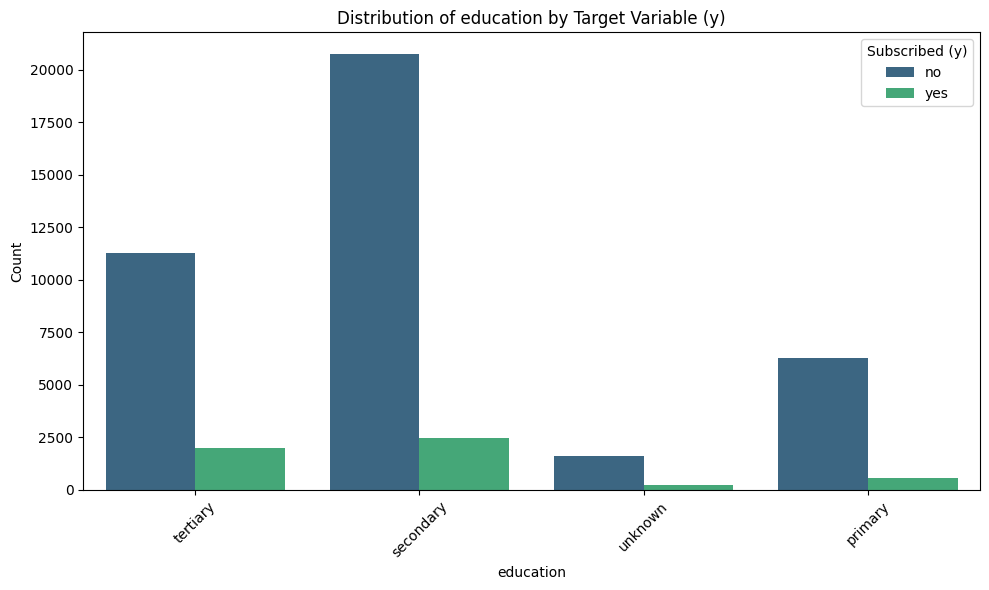

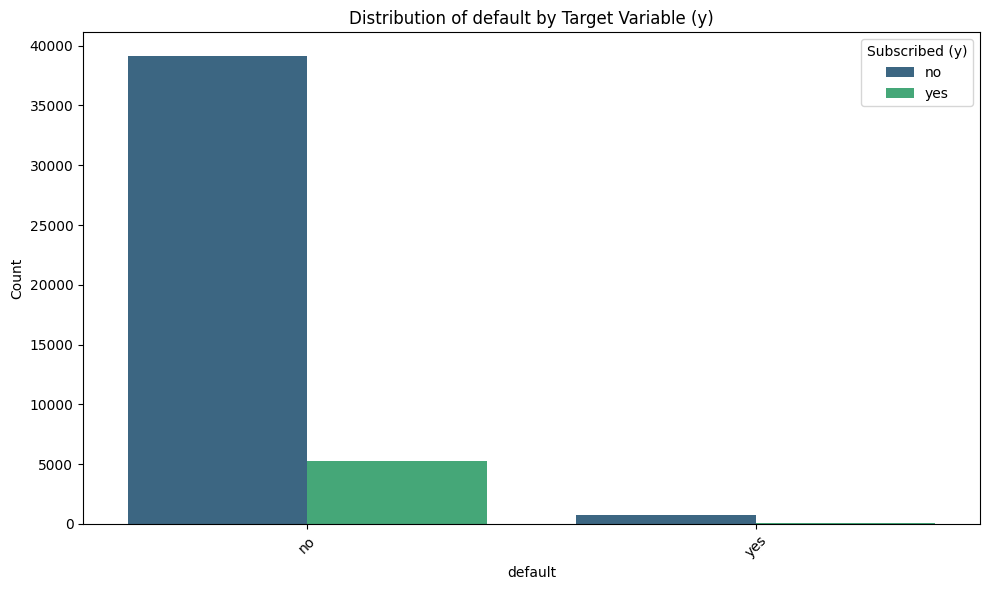

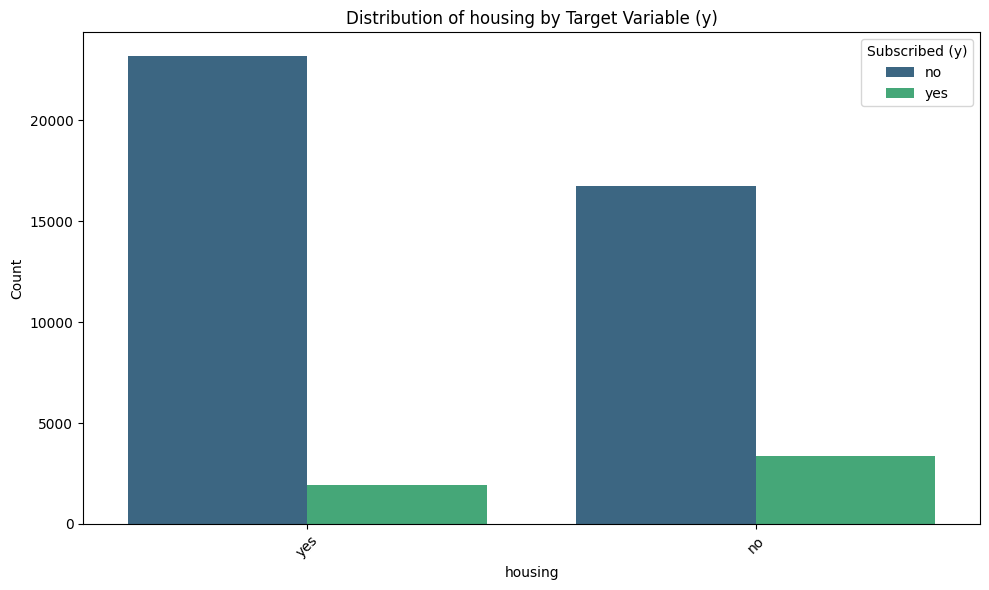

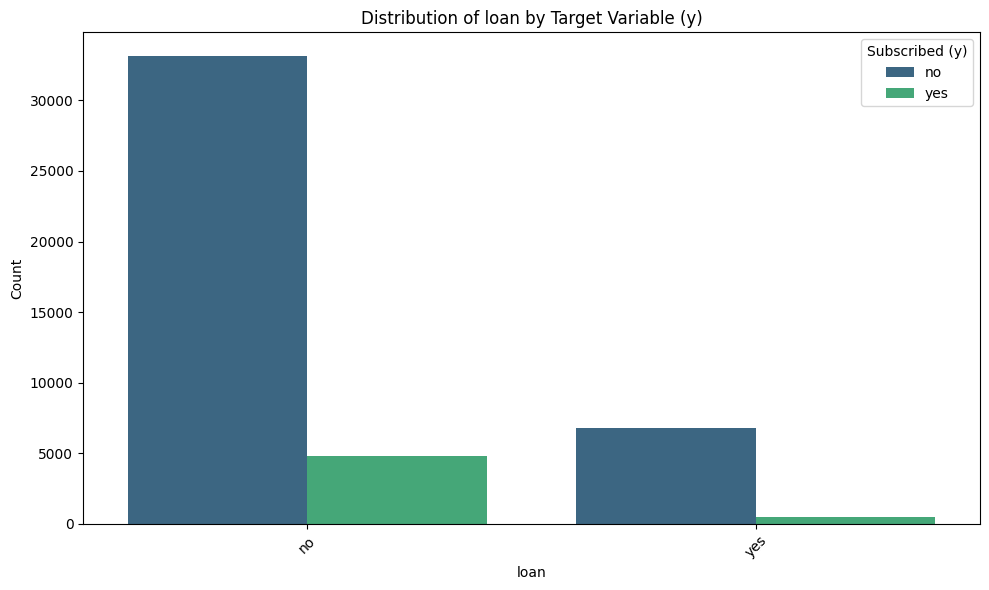

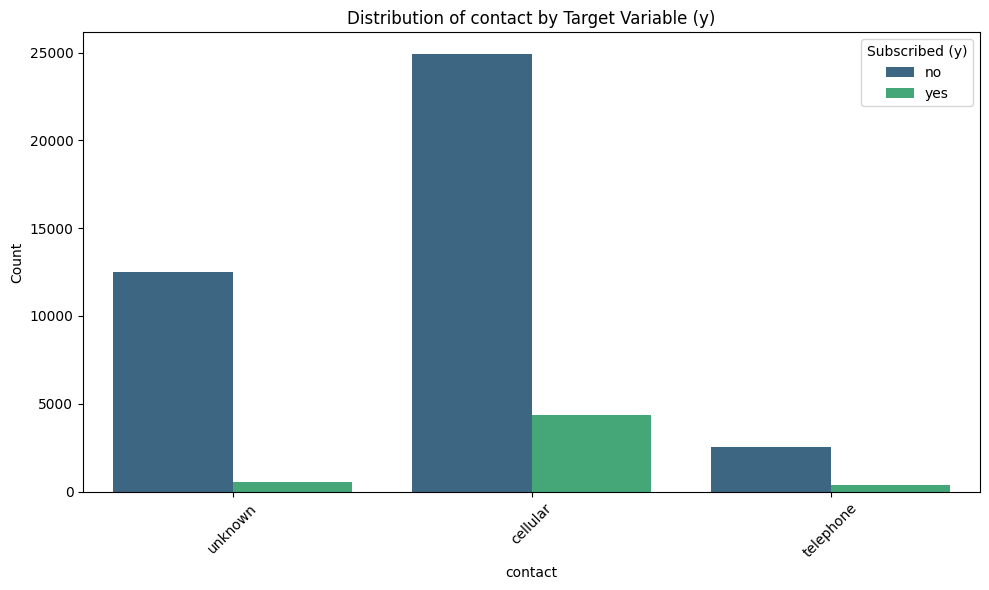

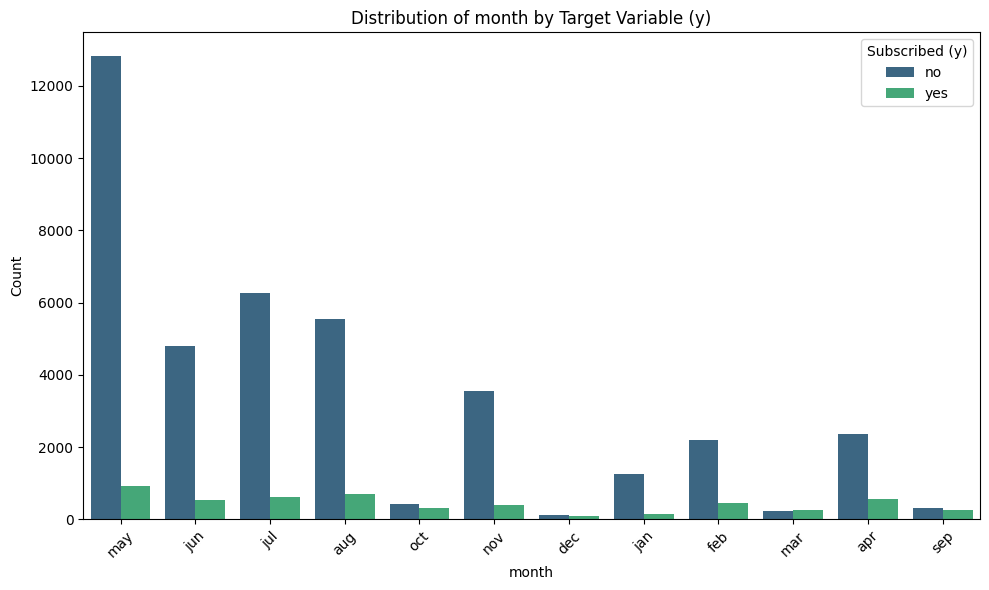

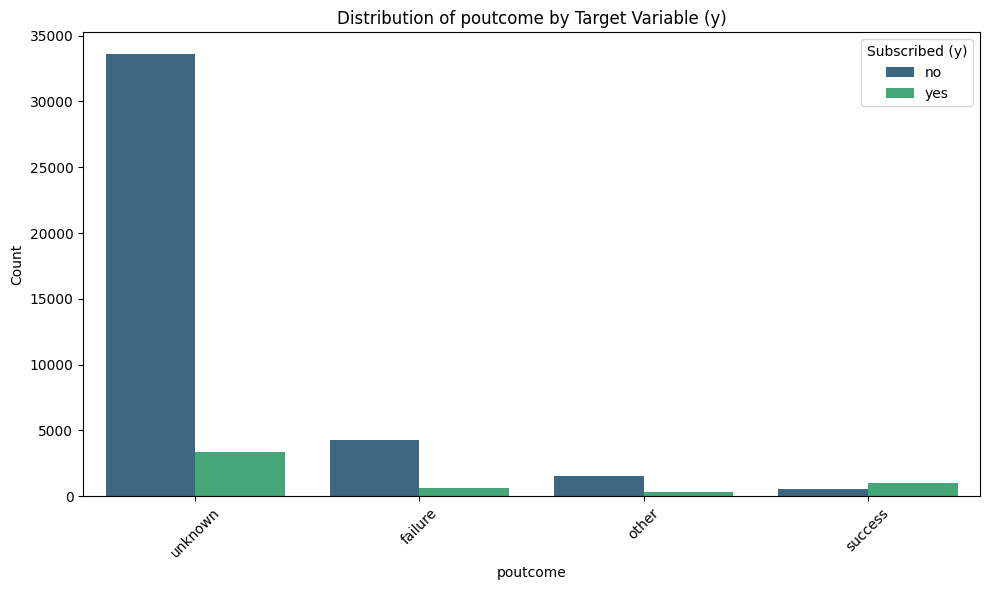

In [8]:
#Now going to visualize relationship between categorical features and target variables
# List of categorical features to visualize
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 
                        'loan', 'contact', 'month', 'poutcome']

# Visualizing each categorical feature and its relationship with the target variable 'y'
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, hue='y', palette='viridis')
    plt.title(f'Distribution of {feature} by Target Variable (y)')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-ticks for better readability
    plt.legend(title='Subscribed (y)', loc='upper right')
    plt.tight_layout()
    plt.show()

Observations:
Job: Most clients fall under "blue-collar," "management," and "technician." The subscription rates vary by job type, with some job categories showing a higher likelihood of subscribing.
Marital: Married clients constitute the majority, but single clients appear more likely to subscribe compared to married ones.
Education: Clients with tertiary education have a higher subscription rate compared to those with lower education levels.
Default: The vast majority of clients do not have credit in default, and those without default tend to subscribe more.
Housing & Loan: Clients with housing loans are less likely to subscribe, while those without personal loans show a higher proportion of subscribing.
Contact: The "cellular" contact type seems more effective for subscriptions compared to "telephone" and "unknown."
Month: May has the most contacts, but other months (e.g., March, September, December) show higher subscription rates.
Poutcome: A successful outcome in the previous campaign significantly increases the likelihood of subscription.

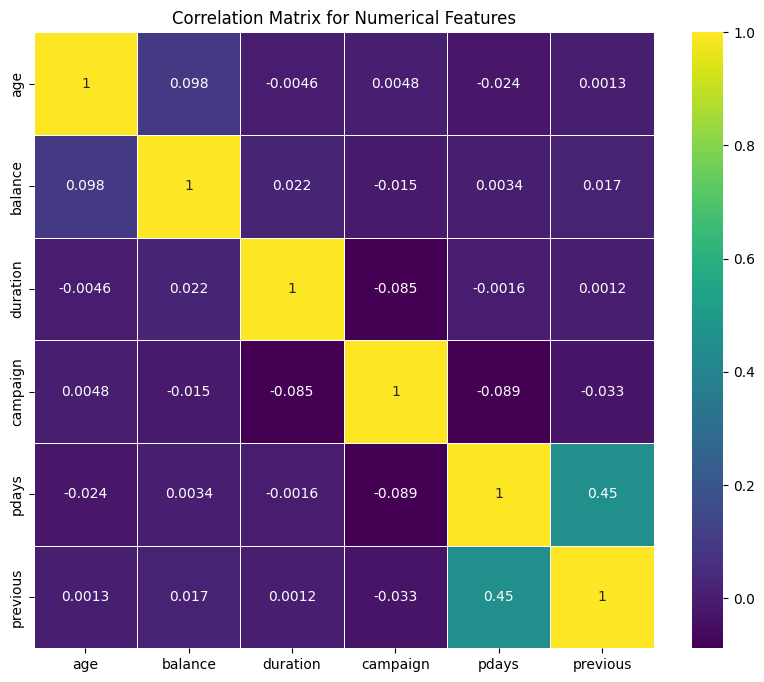

In [9]:
#We now want to proceed with a correlation matrix to help us understand the relationships
#between the numerical features in our dataset 

# Select only the numerical features from the dataset
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Calculate the correlation matrix for the numerical features
correlation_matrix = df[numerical_features].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5, linecolor='white')
plt.title('Correlation Matrix for Numerical Features')
plt.show()



This heatmap shows that most features appear to have a low or no strong correlation with
each other, indicating low multicolinearity
pdays and previous show a moderate positive correlation (approximately 0.45), suggesting some relationship between the number of days 
since last contact and the number of previous contacts.
Other features have very low correlation values, suggesting that they are relatively independent.

In [11]:
#Now that our exploratory data analysis has concluded, we will proceed with building our
#pree-processing pipeline.

# Feature engineering and data preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Define numerical and categorical features
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

Justification of transformations/preprocessing: 

The data preprocessing involved handling both numerical and categorical variables to ensure the dataset was ready for building machine learning models. Initially, missing values were addressed using the median strategy for numerical features and the most frequent value for categorical features. This choice helps maintain the integrity of the data without introducing bias, ensuring that missing data doesn't skew results.
For scaling, numerical features were standardized using StandardScaler. This step was crucial since machine learning models, especially k-NN and logistic regression, are sensitive to feature scales. Standardization ensures that all features contribute equally to the model's performance, preventing any single feature from dominating due to larger numeric ranges.
Categorical features were transformed using one-hot encoding, allowing the models to interpret non-numeric data effectively. By using handle_unknown='ignore', we ensured that the model could handle any unseen categories in future data without errors, improving model robustness.
In summary, these preprocessing steps were carefully selected to address the common challenges posed by real-world data, such as missing values, varied feature scales, and categorical data representation, resulting in a well-prepared dataset for training machine learning models.


In [12]:
# Create a full pipeline
full_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [14]:
# Apply stratified split to maintain the imbalance ratio
X = df.drop('y', axis=1)  # Features
y = df['y']  # Target variable

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Fit the pipeline on the training data
full_pipeline.fit(X_train)

# Apply the preprocessing pipeline to transform training and test data
X_train_transformed = full_pipeline.transform(X_train)
X_test_transformed = full_pipeline.transform(X_test)

# Convert the target variable to binary for ensemble models
y_train_binary = y_train.map({'yes': 1, 'no': 0})
y_test_binary = y_test.map({'yes': 1, 'no': 0})

Part 2: Build Baseline Models

In [15]:
# Build baseline models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [16]:
# Logistic Regression Model
logistic_model = LogisticRegression(random_state=42)
logistic_params = {'C': [0.01, 0.1, 1, 10, 100]}
logistic_grid = GridSearchCV(logistic_model, logistic_params, cv=5, scoring='f1', n_jobs=-1)
logistic_grid.fit(X_train_transformed, y_train_binary)
best_logistic = logistic_grid.best_estimator_

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

In [17]:
# Evaluate Logistic Regression on test data
logistic_test_predictions = best_logistic.predict(X_test_transformed)
print("Logistic Regression Performance on Test Data:")
print(classification_report(y_test_binary, logistic_test_predictions))
print("AUC-ROC Score for Logistic Regression on Test Data:", roc_auc_score(y_test_binary, best_logistic.predict_proba(X_test_transformed)[:, 1]))

Logistic Regression Performance on Test Data:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11977
           1       0.65      0.35      0.46      1587

    accuracy                           0.90     13564
   macro avg       0.79      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564

AUC-ROC Score for Logistic Regression on Test Data: 0.9053258400802757


In [18]:
# k-NN Model
knn_model = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(knn_model, knn_params, cv=5, scoring='f1', n_jobs=-1)
knn_grid.fit(X_train_transformed, y_train_binary)
best_knn = knn_grid.best_estimator_

In [19]:
# Evaluate k-NN on test data
knn_test_predictions = best_knn.predict(X_test_transformed)
print("\nk-NN Performance on Test Data:")
print(classification_report(y_test_binary, knn_test_predictions))
print("AUC-ROC Score for k-NN on Test Data:", roc_auc_score(y_test_binary, best_knn.predict_proba(X_test_transformed)[:, 1]))


k-NN Performance on Test Data:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11977
           1       0.55      0.38      0.45      1587

    accuracy                           0.89     13564
   macro avg       0.74      0.67      0.69     13564
weighted avg       0.88      0.89      0.88     13564

AUC-ROC Score for k-NN on Test Data: 0.7859395126102598


Model Evaluation: 

The Logistic Regression model performed well overall, with an accuracy of 90% and an AUC-ROC score of 0.905, indicating strong discriminatory ability between the classes. However, it struggled with recall for the minority class ('1'), capturing only 35% of true positives, resulting in a lower F1-score of 0.46. In contrast, precision for the majority class ('0') was high at 0.92, indicating that the model was more effective in predicting non-subscribers.

The k-NN model achieved a slightly lower accuracy of 89% and an AUC-ROC score of 0.786, showing moderate performance in distinguishing between the classes. It also faced challenges with the minority class, with a recall of 0.38 and an F1-score of 0.45, though it maintained good performance for the majority class ('0') with a precision of 0.92. Overall, Logistic Regression outperformed k-NN, but both models need further adjustments to improve predictions for the minority class.

In [20]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='f1', n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train_transformed, y_train_binary)
best_rf = rf_grid_search.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-

In [21]:
# Evaluate Random Forest on test data
rf_test_predictions = best_rf.predict(X_test_transformed)
print("\nRandom Forest Performance on Test Data:")
print(classification_report(y_test_binary, rf_test_predictions))
print("AUC-ROC Score for Random Forest on Test Data:", roc_auc_score(y_test_binary, best_rf.predict_proba(X_test_transformed)[:, 1]))


Random Forest Performance on Test Data:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11977
           1       0.67      0.41      0.51      1587

    accuracy                           0.91     13564
   macro avg       0.80      0.69      0.73     13564
weighted avg       0.90      0.91      0.90     13564

AUC-ROC Score for Random Forest on Test Data: 0.9233672983489306


In [23]:
# Importing DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# AdaBoost Model
ada_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), random_state=42)

# Define hyperparameters to tune
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator__max_depth': [1, 2, 3]
}

# Perform GridSearchCV
ada_grid_search = GridSearchCV(estimator=ada_model, param_grid=param_grid_ada, cv=5, scoring='f1', n_jobs=-1, verbose=2)
ada_grid_search.fit(X_train_transformed, y_train_binary)

# Retrieve the best AdaBoost model
best_ada = ada_grid_search.best_estimator_



Fitting 5 folds for each of 27 candidates, totalling 135 fits


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=1, learning_rate=0.01, n_estimators=50; total time=   3.5s
[CV] END base_estimator__max_depth=1, learning_rate=0.01, n_estimators=50; total time=   3.5s
[CV] END base_estimator__max_depth=1, learning_rate=0.01, n_estimators=50; total time=   3.7s
[CV] END base_estimator__max_depth=1, learning_rate=0.01, n_estimators=50; total time=   3.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=1, learning_rate=0.01, n_estimators=50; total time=   3.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=1, learning_rate=0.01, n_estimators=100; total time=   6.8s
[CV] END base_estimator__max_depth=1, learning_rate=0.01, n_estimators=100; total time=   6.7s
[CV] END base_estimator__max_depth=1, learning_rate=0.01, n_estimators=100; total time=   6.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=1, learning_rate=0.01, n_estimators=100; total time=   7.4s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=1, learning_rate=0.01, n_estimators=100; total time=  11.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=1, learning_rate=0.01, n_estimators=200; total time=  18.0s
[CV] END base_estimator__max_depth=1, learning_rate=0.01, n_estimators=200; total time=  18.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=1, learning_rate=0.1, n_estimators=50; total time=   2.7s
[CV] END base_estimator__max_depth=1, learning_rate=0.01, n_estimators=200; total time=  16.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=1, learning_rate=0.01, n_estimators=200; total time=  12.9s
[CV] END base_estimator__max_depth=1, learning_rate=0.1, n_estimators=50; total time=   3.1s
[CV] END base_estimator__max_depth=1, learning_rate=0.1, n_estimators=50; total time=   3.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=1, learning_rate=0.1, n_estimators=50; total time=   3.1s
[CV] END base_estimator__max_depth=1, learning_rate=0.1, n_estimators=50; total time=   3.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=1, learning_rate=0.01, n_estimators=200; total time=  11.4s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=1, learning_rate=0.1, n_estimators=100; total time=   5.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=1, learning_rate=0.1, n_estimators=100; total time=   5.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=1, learning_rate=0.1, n_estimators=100; total time=   6.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=1, learning_rate=0.1, n_estimators=100; total time=   6.2s
[CV] END base_estimator__max_depth=1, learning_rate=0.1, n_estimators=100; total time=   6.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=1, learning_rate=0.1, n_estimators=200; total time=  10.4s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=1, learning_rate=0.1, n_estimators=200; total time=  11.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=1, learning_rate=0.1, n_estimators=200; total time=  10.6s
[CV] END base_estimator__max_depth=1, learning_rate=0.1, n_estimators=200; total time=  10.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=1, learning_rate=1.0, n_estimators=50; total time=   2.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=1, learning_rate=1.0, n_estimators=50; total time=   2.9s
[CV] END base_estimator__max_depth=1, learning_rate=1.0, n_estimators=50; total time=   3.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=1, learning_rate=1.0, n_estimators=50; total time=   2.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=1, learning_rate=1.0, n_estimators=50; total time=   2.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=1, learning_rate=0.1, n_estimators=200; total time=  11.2s
[CV] END base_estimator__max_depth=1, learning_rate=1.0, n_estimators=100; total time=   5.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=1, learning_rate=1.0, n_estimators=100; total time=   6.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=1, learning_rate=1.0, n_estimators=100; total time=   7.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=1, learning_rate=1.0, n_estimators=100; total time=   8.3s
[CV] END base_estimator__max_depth=1, learning_rate=1.0, n_estimators=100; total time=   8.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=1, learning_rate=1.0, n_estimators=200; total time=  13.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=1, learning_rate=1.0, n_estimators=200; total time=  12.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=1, learning_rate=1.0, n_estimators=200; total time=  11.1s
[CV] END base_estimator__max_depth=1, learning_rate=1.0, n_estimators=200; total time=  11.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=0.01, n_estimators=50; total time=   4.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=0.01, n_estimators=50; total time=   4.5s
[CV] END base_estimator__max_depth=2, learning_rate=0.01, n_estimators=50; total time=   4.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=1, learning_rate=1.0, n_estimators=200; total time=  10.9s
[CV] END base_estimator__max_depth=2, learning_rate=0.01, n_estimators=50; total time=   4.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=0.01, n_estimators=50; total time=   4.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=0.01, n_estimators=100; total time=   8.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=0.01, n_estimators=100; total time=   8.8s
[CV] END base_estimator__max_depth=2, learning_rate=0.01, n_estimators=100; total time=   8.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=0.01, n_estimators=100; total time=   9.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=0.01, n_estimators=100; total time=   8.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=0.01, n_estimators=200; total time=  17.3s
[CV] END base_estimator__max_depth=2, learning_rate=0.01, n_estimators=200; total time=  17.4s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=0.01, n_estimators=200; total time=  16.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=0.1, n_estimators=50; total time=   4.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=0.01, n_estimators=200; total time=  17.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=0.1, n_estimators=50; total time=   4.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=0.1, n_estimators=50; total time=   4.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=0.1, n_estimators=50; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=0.1, n_estimators=50; total time=   4.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=0.1, n_estimators=100; total time=   9.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=0.01, n_estimators=200; total time=  19.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=0.1, n_estimators=100; total time=  12.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=0.1, n_estimators=100; total time=  12.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=0.1, n_estimators=100; total time=  11.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=0.1, n_estimators=100; total time=  11.7s
[CV] END base_estimator__max_depth=2, learning_rate=0.1, n_estimators=200; total time=  18.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=0.1, n_estimators=200; total time=  18.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=1.0, n_estimators=50; total time=   4.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=0.1, n_estimators=200; total time=  18.8s
[CV] END base_estimator__max_depth=2, learning_rate=0.1, n_estimators=200; total time=  18.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=1.0, n_estimators=50; total time=   4.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=1.0, n_estimators=50; total time=   5.0s
[CV] END base_estimator__max_depth=2, learning_rate=1.0, n_estimators=50; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=1.0, n_estimators=50; total time=   4.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=0.1, n_estimators=200; total time=  17.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=1.0, n_estimators=100; total time=   8.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=1.0, n_estimators=100; total time=   9.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=1.0, n_estimators=100; total time=   9.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=1.0, n_estimators=100; total time=   9.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=1.0, n_estimators=100; total time=  10.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=1.0, n_estimators=200; total time=  20.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=1.0, n_estimators=200; total time=  20.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=1.0, n_estimators=200; total time=  20.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=1.0, n_estimators=200; total time=  19.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=0.01, n_estimators=50; total time=   6.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=0.01, n_estimators=50; total time=   6.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=0.01, n_estimators=50; total time=   6.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=0.01, n_estimators=50; total time=   6.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=2, learning_rate=1.0, n_estimators=200; total time=  18.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=0.01, n_estimators=50; total time=   6.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=0.01, n_estimators=100; total time=  12.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=0.01, n_estimators=100; total time=  12.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=0.01, n_estimators=100; total time=  12.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=0.01, n_estimators=100; total time=  11.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=0.01, n_estimators=100; total time=  12.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=0.01, n_estimators=200; total time=  24.4s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=0.01, n_estimators=200; total time=  24.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=0.01, n_estimators=200; total time=  24.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=0.1, n_estimators=50; total time=   6.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=0.1, n_estimators=50; total time=   6.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=0.01, n_estimators=200; total time=  24.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=0.1, n_estimators=50; total time=   6.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=0.1, n_estimators=50; total time=   6.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=0.1, n_estimators=50; total time=   6.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=0.01, n_estimators=200; total time=  24.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=0.1, n_estimators=100; total time=  11.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=0.1, n_estimators=100; total time=  11.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=0.1, n_estimators=100; total time=  11.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=0.1, n_estimators=100; total time=  11.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=0.1, n_estimators=100; total time=  12.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=0.1, n_estimators=200; total time=  23.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=0.1, n_estimators=200; total time=  23.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=1.0, n_estimators=50; total time=   6.1s
[CV] END base_estimator__max_depth=3, learning_rate=0.1, n_estimators=200; total time=  23.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=0.1, n_estimators=200; total time=  23.4s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=1.0, n_estimators=50; total time=   5.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=1.0, n_estimators=50; total time=   6.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=1.0, n_estimators=50; total time=   6.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=1.0, n_estimators=50; total time=   6.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=0.1, n_estimators=200; total time=  24.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=1.0, n_estimators=100; total time=  12.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=1.0, n_estimators=100; total time=  12.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=1.0, n_estimators=100; total time=  12.4s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=1.0, n_estimators=100; total time=  12.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=1.0, n_estimators=100; total time=  12.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=1.0, n_estimators=200; total time=  23.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, learning_rate=1.0, n_estimators=200; total time=  23.4s
[CV] END base_estimator__max_depth=3, learning_rate=1.0, n_estimators=200; total time=  22.8s
[CV] END base_estimator__max_depth=3, learning_rate=1.0, n_estimators=200; total time=  21.6s
[CV] END base_estimator__max_depth=3, learning_rate=1.0, n_estimators=200; total time=  18.4s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [24]:
# Evaluate AdaBoost on test data
ada_test_predictions = best_ada.predict(X_test_transformed)
print("\nAdaBoost Performance on Test Data:")
print(classification_report(y_test_binary, ada_test_predictions))
print("AUC-ROC Score for AdaBoost on Test Data:", roc_auc_score(y_test_binary, best_ada.predict_proba(X_test_transformed)[:, 1]))


AdaBoost Performance on Test Data:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     11977
           1       0.59      0.42      0.49      1587

    accuracy                           0.90     13564
   macro avg       0.76      0.69      0.72     13564
weighted avg       0.89      0.90      0.89     13564

AUC-ROC Score for AdaBoost on Test Data: 0.9004223017452219


In [25]:
# Bagging Classifier Model
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3, random_state=42), n_estimators=50, random_state=42, n_jobs=-1)
param_grid_bagging = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.75, 1.0],
    'max_features': [0.5, 0.75, 1.0],
    'base_estimator__max_depth': [3, 5, 7]
}
bagging_grid_search = GridSearchCV(estimator=bagging_model, param_grid=param_grid_bagging, cv=5, scoring='f1', n_jobs=-1, verbose=2)
bagging_grid_search.fit(X_train_transformed, y_train_binary)
best_bagging = bagging_grid_search.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.7s
[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.7s
[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.7s
[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=0.5, n_estimators=50; total time=   2.7s
[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=0.5, n_estimators=50; total time=   2.7s
[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=0.5, n_estimators=50; total time=   2.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=0.5, n_estimators=50; total time=   2.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=0.5, n_estimators=50; total time=   2.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=0.5, n_estimators=100; total time=   4.8s
[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=0.5, n_estimators=100; total time=   5.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=0.5, n_estimators=100; total time=   4.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=0.75, n_estimators=10; total time=   0.7s
[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=0.75, n_estimators=10; total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=0.75, n_estimators=10; total time=   0.6s
[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=0.75, n_estimators=10; total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=0.75, n_estimators=10; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=0.5, n_estimators=100; total time=   4.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=0.75, n_estimators=50; total time=   2.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=0.5, n_estimators=100; total time=   5.3s
[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=0.75, n_estimators=50; total time=   2.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=0.75, n_estimators=50; total time=   3.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=0.75, n_estimators=50; total time=   3.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=0.75, n_estimators=50; total time=   3.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=0.75, n_estimators=100; total time=   5.2s
[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=0.75, n_estimators=100; total time=   5.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=1.0, n_estimators=10; total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=1.0, n_estimators=10; total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=0.75, n_estimators=100; total time=   5.0s
[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=1.0, n_estimators=10; total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=1.0, n_estimators=10; total time=   0.5s
[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=1.0, n_estimators=10; total time=   0.7s
[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=0.75, n_estimators=100; total time=   5.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=1.0, n_estimators=50; total time=   3.1s
[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=0.75, n_estimators=100; total time=   5.8s
[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=1.0, n_estimators=50; total time=   3.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=1.0, n_estimators=50; total time=   3.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=1.0, n_estimators=50; total time=   2.7s
[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=1.0, n_estimators=50; total time=   2.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=1.0, n_estimators=100; total time=   5.6s
[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=1.0, n_estimators=100; total time=   5.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=0.5, n_estimators=10; total time=   0.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=0.5, n_estimators=10; total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=0.5, n_estimators=10; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=1.0, n_estimators=100; total time=   6.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=0.5, n_estimators=10; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=1.0, n_estimators=100; total time=   6.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=0.5, n_estimators=10; total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.5, max_samples=1.0, n_estimators=100; total time=   7.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=0.5, n_estimators=50; total time=   4.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=0.5, n_estimators=50; total time=   4.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=0.5, n_estimators=50; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=0.5, n_estimators=50; total time=   3.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=0.5, n_estimators=50; total time=   3.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=0.5, n_estimators=100; total time=   5.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=0.5, n_estimators=100; total time=   5.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=0.75, n_estimators=10; total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=0.5, n_estimators=100; total time=   5.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=0.75, n_estimators=10; total time=   0.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=0.75, n_estimators=10; total time=   0.7s
[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=0.5, n_estimators=100; total time=   5.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=0.75, n_estimators=10; total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=0.75, n_estimators=10; total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=0.5, n_estimators=100; total time=   6.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=0.75, n_estimators=50; total time=   3.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=0.75, n_estimators=50; total time=   3.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=0.75, n_estimators=50; total time=   3.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=0.75, n_estimators=50; total time=   3.4s
[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=0.75, n_estimators=50; total time=   3.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=0.75, n_estimators=100; total time=   6.0s
[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=0.75, n_estimators=100; total time=   6.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=1.0, n_estimators=10; total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=1.0, n_estimators=10; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=1.0, n_estimators=10; total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=0.75, n_estimators=100; total time=   6.2s
[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=0.75, n_estimators=100; total time=   6.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=1.0, n_estimators=10; total time=   0.9s
[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=1.0, n_estimators=10; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=1.0, n_estimators=50; total time=   3.5s
[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=0.75, n_estimators=100; total time=   6.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=1.0, n_estimators=50; total time=   3.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=1.0, n_estimators=50; total time=   3.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=1.0, n_estimators=50; total time=   3.4s
[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=1.0, n_estimators=50; total time=   3.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=1.0, n_estimators=100; total time=   6.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=1.0, n_estimators=100; total time=   6.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=0.5, n_estimators=10; total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=0.5, n_estimators=10; total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=0.5, n_estimators=10; total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=0.5, n_estimators=10; total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=0.5, n_estimators=10; total time=   0.5s
[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=1.0, n_estimators=100; total time=   6.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=1.0, n_estimators=100; total time=   7.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=0.5, n_estimators=50; total time=   2.9s
[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=0.5, n_estimators=50; total time=   3.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=0.5, n_estimators=50; total time=   3.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=0.75, max_samples=1.0, n_estimators=100; total time=   7.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=0.5, n_estimators=50; total time=   3.0s
[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=0.5, n_estimators=50; total time=   2.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=0.5, n_estimators=100; total time=   6.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=0.5, n_estimators=100; total time=   6.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=0.75, n_estimators=10; total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=0.75, n_estimators=10; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=0.5, n_estimators=100; total time=   6.3s
[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=0.5, n_estimators=100; total time=   6.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=0.75, n_estimators=10; total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=0.75, n_estimators=10; total time=   0.9s
[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=0.75, n_estimators=10; total time=   0.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=0.5, n_estimators=100; total time=   5.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=0.75, n_estimators=50; total time=   3.9s
[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=0.75, n_estimators=50; total time=   3.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=0.75, n_estimators=50; total time=   3.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=0.75, n_estimators=50; total time=   3.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=0.75, n_estimators=50; total time=   3.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=0.75, n_estimators=100; total time=   7.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=0.75, n_estimators=100; total time=   7.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=1.0, n_estimators=10; total time=   0.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=1.0, n_estimators=10; total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=0.75, n_estimators=100; total time=   7.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=1.0, n_estimators=10; total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=1.0, n_estimators=10; total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=0.75, n_estimators=100; total time=   7.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=1.0, n_estimators=10; total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=0.75, n_estimators=100; total time=   7.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=1.0, n_estimators=50; total time=   4.4s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=1.0, n_estimators=50; total time=   4.4s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=1.0, n_estimators=50; total time=   4.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=1.0, n_estimators=50; total time=   4.4s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=1.0, n_estimators=50; total time=   4.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=1.0, n_estimators=100; total time=   8.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=1.0, n_estimators=100; total time=   8.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=0.5, n_estimators=10; total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.9s
[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=1.0, n_estimators=100; total time=   9.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=0.5, n_estimators=10; total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=1.0, n_estimators=100; total time=  10.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=0.5, n_estimators=50; total time=   4.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=0.5, n_estimators=50; total time=   3.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=0.5, n_estimators=50; total time=   3.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=3, max_features=1.0, max_samples=1.0, n_estimators=100; total time=  13.1s
[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=0.5, n_estimators=50; total time=   4.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=0.5, n_estimators=50; total time=   5.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=0.5, n_estimators=100; total time=  10.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=0.5, n_estimators=100; total time=  10.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=0.5, n_estimators=100; total time=  11.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=0.5, n_estimators=100; total time=  10.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=0.75, n_estimators=10; total time=   1.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=0.75, n_estimators=10; total time=   1.9s
[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=0.75, n_estimators=10; total time=   1.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=0.75, n_estimators=10; total time=   1.4s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=0.75, n_estimators=10; total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=0.5, n_estimators=100; total time=  10.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=0.75, n_estimators=50; total time=   6.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=0.75, n_estimators=50; total time=   7.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=0.75, n_estimators=50; total time=   6.4s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=0.75, n_estimators=50; total time=   6.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=0.75, n_estimators=50; total time=   6.4s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=0.75, n_estimators=100; total time=  12.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=0.75, n_estimators=100; total time=  12.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=1.0, n_estimators=10; total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=1.0, n_estimators=10; total time=   1.3s
[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=0.75, n_estimators=100; total time=  11.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=0.75, n_estimators=100; total time=  11.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=1.0, n_estimators=10; total time=   1.5s
[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=1.0, n_estimators=10; total time=   1.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=1.0, n_estimators=10; total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=0.75, n_estimators=100; total time=   8.0s
[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=1.0, n_estimators=50; total time=   3.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=1.0, n_estimators=50; total time=   4.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=1.0, n_estimators=50; total time=   4.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=1.0, n_estimators=50; total time=   4.4s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=1.0, n_estimators=50; total time=   4.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=1.0, n_estimators=100; total time=   9.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=1.0, n_estimators=100; total time=  11.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=0.5, n_estimators=10; total time=   1.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=0.5, n_estimators=10; total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=1.0, n_estimators=100; total time=  12.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=0.5, n_estimators=10; total time=   1.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=1.0, n_estimators=100; total time=  12.4s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=0.5, n_estimators=10; total time=   1.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=0.5, n_estimators=10; total time=   1.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.5, max_samples=1.0, n_estimators=100; total time=  12.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=0.5, n_estimators=50; total time=   7.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=0.5, n_estimators=50; total time=   7.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=0.5, n_estimators=50; total time=   7.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=0.5, n_estimators=50; total time=   7.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=0.5, n_estimators=50; total time=   7.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=0.5, n_estimators=100; total time=  14.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=0.5, n_estimators=100; total time=  15.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=0.75, n_estimators=10; total time=   2.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=0.75, n_estimators=10; total time=   1.5s
[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=0.5, n_estimators=100; total time=  14.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=0.5, n_estimators=100; total time=  14.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=0.75, n_estimators=10; total time=   2.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=0.75, n_estimators=10; total time=   2.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=0.75, n_estimators=10; total time=   2.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=0.5, n_estimators=100; total time=  16.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=0.75, n_estimators=50; total time=  10.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=0.75, n_estimators=50; total time=  10.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=0.75, n_estimators=50; total time=  10.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=0.75, n_estimators=50; total time=   8.8s
[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=0.75, n_estimators=50; total time=   7.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=0.75, n_estimators=100; total time=  15.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=0.75, n_estimators=100; total time=  14.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=1.0, n_estimators=10; total time=   1.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=1.0, n_estimators=10; total time=   1.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=0.75, n_estimators=100; total time=  14.0s
[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=0.75, n_estimators=100; total time=  13.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=1.0, n_estimators=10; total time=   2.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=1.0, n_estimators=10; total time=   1.6s
[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=1.0, n_estimators=10; total time=   1.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=0.75, n_estimators=100; total time=  13.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=1.0, n_estimators=50; total time=   7.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=1.0, n_estimators=50; total time=   7.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=1.0, n_estimators=50; total time=   7.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=1.0, n_estimators=50; total time=   8.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=1.0, n_estimators=50; total time=   8.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=1.0, n_estimators=100; total time=  18.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=1.0, n_estimators=100; total time=  19.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=0.5, n_estimators=10; total time=   1.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=0.5, n_estimators=10; total time=   2.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=0.5, n_estimators=10; total time=   2.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=1.0, n_estimators=100; total time=  19.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=1.0, n_estimators=100; total time=  19.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=0.5, n_estimators=10; total time=   2.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=0.5, n_estimators=10; total time=   2.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=0.5, n_estimators=50; total time=   7.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=0.5, n_estimators=50; total time=   7.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=0.5, n_estimators=50; total time=   7.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=0.75, max_samples=1.0, n_estimators=100; total time=  17.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=0.5, n_estimators=50; total time=   6.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=0.5, n_estimators=50; total time=   6.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=0.5, n_estimators=100; total time=  12.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=0.5, n_estimators=100; total time=  12.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=0.75, n_estimators=10; total time=   1.4s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=0.75, n_estimators=10; total time=   2.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=0.5, n_estimators=100; total time=  11.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=0.5, n_estimators=100; total time=  11.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=0.75, n_estimators=10; total time=   1.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=0.75, n_estimators=10; total time=   1.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=0.75, n_estimators=10; total time=   1.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=0.5, n_estimators=100; total time=  12.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=0.75, n_estimators=50; total time=   8.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=0.75, n_estimators=50; total time=   8.4s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=0.75, n_estimators=50; total time=   8.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=0.75, n_estimators=50; total time=   8.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=0.75, n_estimators=50; total time=   9.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=0.75, n_estimators=100; total time=  18.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=0.75, n_estimators=100; total time=  18.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=1.0, n_estimators=10; total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=1.0, n_estimators=10; total time=   2.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=0.75, n_estimators=100; total time=  17.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=1.0, n_estimators=10; total time=   2.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=0.75, n_estimators=100; total time=  18.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=1.0, n_estimators=10; total time=   2.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=1.0, n_estimators=10; total time=   2.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=0.75, n_estimators=100; total time=  16.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=1.0, n_estimators=50; total time=   9.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=1.0, n_estimators=50; total time=  10.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=1.0, n_estimators=50; total time=  10.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=1.0, n_estimators=50; total time=   9.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=1.0, n_estimators=50; total time=  10.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=1.0, n_estimators=100; total time=  19.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=1.0, n_estimators=100; total time=  20.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=0.5, n_estimators=10; total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=0.5, n_estimators=10; total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=0.5, n_estimators=10; total time=   2.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=0.5, n_estimators=10; total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=1.0, n_estimators=100; total time=  22.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=1.0, n_estimators=100; total time=  22.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=0.5, n_estimators=50; total time=   6.4s
[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=0.5, n_estimators=50; total time=   6.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=0.5, n_estimators=50; total time=   5.4s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=0.5, n_estimators=50; total time=   5.7s
[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=0.5, n_estimators=50; total time=   5.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=5, max_features=1.0, max_samples=1.0, n_estimators=100; total time=  24.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=0.5, n_estimators=100; total time=  10.4s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=0.5, n_estimators=100; total time=   9.5s
[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=0.5, n_estimators=100; total time=   9.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=0.75, n_estimators=10; total time=   1.2s
[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=0.75, n_estimators=10; total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=0.5, n_estimators=100; total time=   8.4s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=0.75, n_estimators=10; total time=   1.2s
[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=0.75, n_estimators=10; total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=0.75, n_estimators=10; total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=0.5, n_estimators=100; total time=   7.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=0.75, n_estimators=50; total time=   4.3s
[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=0.75, n_estimators=50; total time=   4.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=0.75, n_estimators=50; total time=   4.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=0.75, n_estimators=50; total time=   4.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=0.75, n_estimators=50; total time=   4.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=0.75, n_estimators=100; total time=   9.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=0.75, n_estimators=100; total time=  10.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=1.0, n_estimators=10; total time=   2.4s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=0.75, n_estimators=100; total time=  12.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=1.0, n_estimators=10; total time=   2.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=0.75, n_estimators=100; total time=  13.0s
[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=1.0, n_estimators=10; total time=   2.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=1.0, n_estimators=10; total time=   2.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=1.0, n_estimators=10; total time=   2.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=1.0, n_estimators=50; total time=   8.8s
[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=0.75, n_estimators=100; total time=  16.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=1.0, n_estimators=50; total time=   9.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=1.0, n_estimators=50; total time=   9.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=1.0, n_estimators=50; total time=   9.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=1.0, n_estimators=50; total time=  10.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=1.0, n_estimators=100; total time=  15.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=1.0, n_estimators=100; total time=  15.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=0.5, n_estimators=10; total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=0.5, n_estimators=10; total time=   1.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=1.0, n_estimators=100; total time=  12.5s
[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=1.0, n_estimators=100; total time=  12.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=0.5, n_estimators=10; total time=   1.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=0.5, n_estimators=10; total time=   1.8s
[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=0.5, n_estimators=10; total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.5, max_samples=1.0, n_estimators=100; total time=  11.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=0.5, n_estimators=50; total time=   6.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=0.5, n_estimators=50; total time=   5.6s
[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=0.5, n_estimators=50; total time=   5.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=0.5, n_estimators=50; total time=   5.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=0.5, n_estimators=50; total time=   5.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=0.5, n_estimators=100; total time=  12.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=0.5, n_estimators=100; total time=  12.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=0.75, n_estimators=10; total time=   1.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=0.75, n_estimators=10; total time=   2.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=0.5, n_estimators=100; total time=  13.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=0.5, n_estimators=100; total time=  13.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=0.75, n_estimators=10; total time=   2.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=0.75, n_estimators=10; total time=   3.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=0.75, n_estimators=10; total time=   2.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=0.5, n_estimators=100; total time=  14.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=0.75, n_estimators=50; total time=   8.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=0.75, n_estimators=50; total time=   8.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=0.75, n_estimators=50; total time=   8.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=0.75, n_estimators=50; total time=   9.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=0.75, n_estimators=50; total time=  10.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=0.75, n_estimators=100; total time=  21.3s
[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=0.75, n_estimators=100; total time=  21.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=1.0, n_estimators=10; total time=   2.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=1.0, n_estimators=10; total time=   2.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=0.75, n_estimators=100; total time=  19.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=0.75, n_estimators=100; total time=  19.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=1.0, n_estimators=10; total time=   2.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=1.0, n_estimators=10; total time=   2.4s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=1.0, n_estimators=10; total time=   2.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=0.75, n_estimators=100; total time=  17.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=1.0, n_estimators=50; total time=  11.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=1.0, n_estimators=50; total time=  10.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=1.0, n_estimators=50; total time=  10.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=1.0, n_estimators=50; total time=   9.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=1.0, n_estimators=50; total time=   9.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=1.0, n_estimators=100; total time=  22.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=1.0, n_estimators=100; total time=  23.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=0.5, n_estimators=10; total time=   2.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=0.5, n_estimators=10; total time=   2.5s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=0.5, n_estimators=10; total time=   2.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=1.0, n_estimators=100; total time=  25.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=1.0, n_estimators=100; total time=  25.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=0.5, n_estimators=10; total time=   3.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=0.5, n_estimators=10; total time=   2.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=0.5, n_estimators=50; total time=  10.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=0.5, n_estimators=50; total time=  10.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=0.5, n_estimators=50; total time=   9.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=0.75, max_samples=1.0, n_estimators=100; total time=  23.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=0.5, n_estimators=50; total time=  11.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=0.5, n_estimators=50; total time=  11.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=0.5, n_estimators=100; total time=  21.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=0.5, n_estimators=100; total time=  22.4s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=0.75, n_estimators=10; total time=   3.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=0.75, n_estimators=10; total time=   4.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=0.5, n_estimators=100; total time=  23.7s
[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=0.5, n_estimators=100; total time=  23.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=0.75, n_estimators=10; total time=   3.6s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=0.75, n_estimators=10; total time=   3.3s
[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=0.75, n_estimators=10; total time=   3.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=0.5, n_estimators=100; total time=  22.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=0.75, n_estimators=50; total time=  13.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=0.75, n_estimators=50; total time=  12.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=0.75, n_estimators=50; total time=  12.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=0.75, n_estimators=50; total time=  12.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=0.75, n_estimators=50; total time=  13.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=0.75, n_estimators=100; total time=  25.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=0.75, n_estimators=100; total time=  26.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=1.0, n_estimators=10; total time=   4.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=0.75, n_estimators=100; total time=  26.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=1.0, n_estimators=10; total time=   4.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=1.0, n_estimators=10; total time=   3.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=0.75, n_estimators=100; total time=  24.9s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=1.0, n_estimators=10; total time=   3.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=1.0, n_estimators=10; total time=   3.7s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=0.75, n_estimators=100; total time=  26.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=1.0, n_estimators=50; total time=  15.4s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=1.0, n_estimators=50; total time=  15.3s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=1.0, n_estimators=50; total time=  15.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=1.0, n_estimators=50; total time=  16.2s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=1.0, n_estimators=50; total time=  17.0s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=1.0, n_estimators=100; total time=  27.1s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=1.0, n_estimators=100; total time=  26.2s
[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=1.0, n_estimators=100; total time=  24.0s
[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=1.0, n_estimators=100; total time=  23.9s
[CV] END base_estimator__max_depth=7, max_features=1.0, max_samples=1.0, n_estimators=100; total time=  17.8s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [26]:
# Evaluate Bagging Classifier on test data
bagging_test_predictions = best_bagging.predict(X_test_transformed)
print("\nBagging Classifier Performance on Test Data:")
print(classification_report(y_test_binary, bagging_test_predictions))
print("AUC-ROC Score for Bagging Classifier on Test Data:", roc_auc_score(y_test_binary, best_bagging.predict_proba(X_test_transformed)[:, 1]))


Bagging Classifier Performance on Test Data:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11977
           1       0.65      0.36      0.46      1587

    accuracy                           0.90     13564
   macro avg       0.78      0.67      0.70     13564
weighted avg       0.89      0.90      0.89     13564

AUC-ROC Score for Bagging Classifier on Test Data: 0.8919171059801186


In [29]:
# Voting Classifier Model
from sklearn.ensemble import VotingClassifier

# Instantiate the base models with the best estimators from previous training/tuning
voting_clf_hard = VotingClassifier(
    estimators=[
        ('logistic', best_logistic),      # Logistic Regression
        ('knn', best_knn),                # k-NN
        ('random_forest', best_rf),       # Random Forest
        ('ada_boost', best_ada),          # AdaBoost Model
        ('bagging', best_bagging)         # Bagging Classifier
    ],
    voting='hard',   # Hard voting
    n_jobs=-1
)

# Fit the hard voting classifier on the training data
voting_clf_hard.fit(X_train_transformed, y_train_binary)

# Evaluate the hard voting model on the test data
hard_voting_test_predictions = voting_clf_hard.predict(X_test_transformed)
print("\nVoting Classifier (Hard Voting) Performance on Test Data:")
print(classification_report(y_test_binary, hard_voting_test_predictions))

# Soft Voting Classifier
voting_clf_soft = VotingClassifier(
    estimators=[
        ('logistic', best_logistic),      # Logistic Regression
        ('knn', best_knn),                # k-NN
        ('random_forest', best_rf),       # Random Forest
        ('ada_boost', best_ada),          # AdaBoost Model
        ('bagging', best_bagging)         # Bagging Classifier
    ],
    voting='soft',  # Soft voting
    n_jobs=-1
)

# Fit the soft voting classifier on the training data
voting_clf_soft.fit(X_train_transformed, y_train_binary)

# Evaluate the soft voting model on the test data
soft_voting_test_predictions = voting_clf_soft.predict(X_test_transformed)
print("\nVoting Classifier (Soft Voting) Performance on Test Data:")
print(classification_report(y_test_binary, soft_voting_test_predictions))
print("AUC-ROC Score for Voting Classifier (Soft Voting):", roc_auc_score(y_test_binary, voting_clf_soft.predict_proba(X_test_transformed)[:, 1]))



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Voting Classifier (Hard Voting) Performance on Test Data:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11977
           1       0.68      0.38      0.49      1587

    accuracy                           0.91     13564
   macro avg       0.80      0.68      0.72     13564
weighted avg       0.89      0.91      0.89     13564



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Voting Classifier (Soft Voting) Performance on Test Data:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11977
           1       0.66      0.35      0.46      1587

    accuracy                           0.90     13564
   macro avg       0.79      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564

AUC-ROC Score for Voting Classifier (Soft Voting): 0.919407545411419


Part 4: Performance Comparison 

The evaluation of the models demonstrates distinct variations in their performance and efficiency. Starting with the baseline models, Logistic Regression achieved an accuracy of 90%, with a high AUC-ROC score of 0.9053. It demonstrated better recall for the 'yes' class than k-NN but still struggled with capturing all positive instances effectively. The k-NN model performed similarly in terms of accuracy (89%) but had a lower AUC-ROC score (0.7859). Despite being relatively fast to train, k-NN generally required more time for prediction due to its distance-based nature.

Among the ensemble models, the Random Forest classifier outperformed all models with an accuracy of 91% and the highest AUC-ROC score of 0.9234. It offered a good balance between precision and recall, capturing the positive class better than other models, although it required longer training time due to hyperparameter tuning and ensemble nature. The AdaBoost and Bagging Classifier models also achieved strong performances with AUC-ROC scores of 0.9004 and 0.8919, respectively, and an accuracy of 90%. These models performed well but did not match the overall effectiveness of the Random Forest.

Finally, the Voting Classifier models displayed consistent and competitive results. The hard voting version achieved an accuracy of 91% with an AUC-ROC of 0.9194, closely following the Random Forest's performance. The soft voting version performed slightly less effectively with an AUC-ROC of 0.9194, indicating a similar trade-off between precision and recall as seen in the baseline models. Overall, the Random Forest and Voting Classifier (hard voting) were the top performers, excelling in capturing the complexity of the dataset at the expense of increased computational time compared to simpler models.

Part 5: Interpretation and Justification

Why Did the Ensemble Models Perform the Way They Did?

1. Random Forest Performance Analysis:

How It Works: 
Random Forest constructs multiple decision trees, each trained on different data subsets and features, leveraging "bagging" to reduce variance and avoid overfitting. It combines the predictions of individual trees to create a more stable and generalized model output.

Why It Performed Well: 
The Random Forest model performed strongly due to its ability to capture complex, non-linear interactions between features. This makes it well-suited for datasets with intricate patterns, providing robustness against noise. Additionally, its internal mechanism of averaging predictions allowed it to handle variability more effectively than single models.

Expected Results: 
Given its ensemble nature, Random Forest's high accuracy and AUC-ROC score were anticipated, although it could be further improved with targeted techniques for handling class imbalance.

2. Bagging Classifier Performance Analysis:

How It Works: 
Bagging aggregates multiple versions of a base model trained on different data subsets, reducing overfitting by smoothing the decision boundary across diverse models.

Why It Performed Well: 
The Bagging Classifier showed improved stability over individual models, handling variability and noise. However, since it doesn’t inherently handle class imbalance, it didn't perform as well as Random Forest on minority class predictions.

Expected Results: 
The model met expectations by improving over single classifiers but struggled slightly with the imbalance in target classes.

3. Comparing to Non-Ensemble Models (Logistic Regression & k-NN)

Logistic Regression: 
As a linear model, it underperformed on complex, non-linear relationships within the data, lacking the flexibility to adapt to the dataset's intricate patterns.

k-NN: 
It struggled with high-dimensional data, making distance calculations less meaningful and directly suffering from the class imbalance, which impacted recall for the minority class.

Was the Performance Expected?

Yes, ensemble models generally outperform single models in capturing complex relationships and reducing overfitting. However, the challenge with class imbalance suggests that fine-tuning strategies like class weighting or SMOTE could further enhance their performance.

Business Implications and Model Selection:

Based on the analysis, the Random Forest model stands out as the most suitable choice for business implementation, and here is why:

Performance Metrics:

Robust Accuracy: 

The Random Forest model demonstrated high precision, recall, and F1 scores, crucial for making reliable predictions in business contexts where accurate forecasting is directly linked to financial gains or losses.

Balanced Trade-off: 

It maintained a good balance between precision and recall, ensuring that the model effectively captures both positive and negative instances, which is essential for applications like customer churn prediction or credit risk assessment.


Feature Importance: 

Random Forest provides insights into which features most influence predictions, aiding strategic decision-making. This transparency is valuable for justifying outcomes to stakeholders and optimizing business strategies based on data-driven insights.

Moderate Complexity: 

While more resource-intensive than logistic regression, Random Forest offers a manageable computational load with parallel processing capabilities, making it suitable for scaling as data volumes increase.

Efficient Training & Prediction: 

It balances computational efficiency with performance, ensuring it can be deployed in real-time or near-real-time applications without incurring prohibitive costs.

Handling of Class Imbalance: 

Although not perfect, the Random Forest can be adjusted with class weighting or sampling methods to enhance its performance on imbalanced datasets, making it adaptable to real-world business applications where such imbalances are common.
Decision Criteria

Precision-Recall Trade-off: 

Random Forest offered a strong F1 score, balancing precision and recall, making it suitable for scenarios where both false positives and negatives have significant costs.

Computational Cost: 

Random Forest is computationally feasible for medium to large datasets, unlike k-NN, which scales poorly with data size.

Interpretability: 

While not as transparent as logistic regression, Random Forest’s feature importance offers sufficient interpretability for business contexts.
Comparative Analysis of Other Models

Logistic Regression:

Pros: Highly interpretable and computationally efficient.

Cons: Lacks the complexity needed for real-world data patterns, resulting in poorer performance.

Business Impact: Suitable for simpler tasks but insufficient for nuanced decision-making.

k-NN:

Pros: Intuitive and easy to understand.

Cons: Computationally expensive, especially for large datasets, and lacks interpretability.

Business Impact: Unsuitable for real-time predictions or large-scale deployments.

Bagging Classifier:

Pros: Offers stability and reduces overfitting.

Cons: More computationally intensive and less interpretable.

Business Impact: Less feasible due to higher costs and complexity without significant performance gains over Random Forest.

Conclusion: 

Random Forest offers the best combination of predictive power, interpretability, computational efficiency, and scalability. It aligns well with business requirements by providing actionable insights, handling data complexity, and maintaining performance even with imbalanced datasets. This makes it the optimal choice for implementation in a business context where both accuracy and interpretability are vital for informed decision-making.